In [1059]:
%matplotlib inline
from PIL import Image, ImageDraw
import numpy as np
import math
from scipy import signal
from hw2 import ncc
import matplotlib.pyplot as plt

# Assignment 2
Ignacio Iturralde Ch. (student #23910145)

#### Question 1

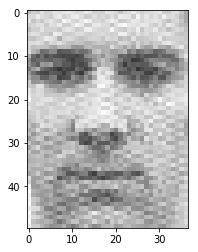

In [1096]:
temp_im = Image.open('hw2/faces/template.jpg')
students = Image.open('hw2/faces/students.jpg')
tree = Image.open('hw2/faces/tree.jpg')
family = Image.open('hw2/faces/family.jpg')
fans = Image.open('hw2/faces/fans.jpg')
sports = Image.open('hw2/faces/sports.jpg')
imgs = [judybats, students, tree, family, fans, sports]

plt.imshow(temp_im);

#### Question 2

In [1097]:
# input: - an image
#        - an integer - is minimum size of the smallest dimension
# effect: creates a list of images each 0.75 smaller than the last
#         and the smallest dimension always remains larger than minsize
# returns: returns a list of images of deacresing size, i.e. a Gaussian pyramid
def MakePyramid(img, minsize):
    pyramid = [img]
    (width, height) = img.size
    i = 0
    while min(width, height)*0.75 > minsize:
        img = img.resize((int(width*0.75), int(height*0.75)), Image.BICUBIC)
        (width, height) = img.size
        pyramid.append(img)
    return pyramid

In [1098]:
pyr = MakePyramid(temp_im, 10)

#### Question 3

In [1099]:
# input: a pyramid of an image
# effect: displays all images with a small space inbetween
# returns: nothing
def ShowPyramid(pyramid):
    tot_width = 0
    max_height = 0
    x_offset = 5
    for p in pyramid:
        tot_width += p.size[0]+1
        max_height = max(max_height, p.size[1])
    img = Image.new('L', (tot_width+1, max_height), 'white')
    
    for p in pyramid:
        (width, height) = p.size
        img.paste(p, (x_offset, max_height-height))
        x_offset += width+5
    plt.imshow(img)    

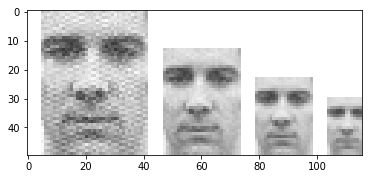

In [1100]:
ShowPyramid(pyr)

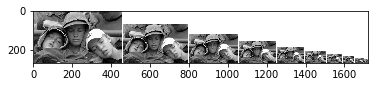

In [1101]:
ShowPyramid(MakePyramid(fans, 10))

#### Question 4

In [1102]:
# input: - pyramid of images
#        - template to match to find within each image in the pyramid
#        - threshold to cap correlation between image patch and template
# effect: places a red rectangles around the template matches
# returns: RGB image
def FindTemplate(pyramid, temp, threshold):
    shrink_factor = 4
    (xtemp, ytemp) = temp.size
    temp = temp.resize((15, round(ytemp/(xtemp/15))), Image.BICUBIC)
    col_temp = pyramid[0].convert('RGB')
    draw = ImageDraw.Draw(col_temp)
    count = 0
    for p in pyramid:
#         if(count > 3):
        im = ncc.normxcorr2D(p, temp)
        (y,x) = np.where(im > threshold)
        if(x.size > 0):
            xmin = (x - temp.size[0]/2)*pow(1/.75, count)
            xmax = (x + temp.size[0]/2)*pow(1/.75, count)
            ymin = (y - temp.size[1]/2)*pow(1/.75, count)
            ymax = (y + temp.size[1]/2)*pow(1/.75, count)
            for i in range(x.size):
                draw.line((xmin[i], ymin[i],
                           xmax[i], ymin[i]), fill="red", width=2)
                draw.line((xmin[i], ymax[i],
                           xmax[i], ymax[i]), fill="red", width=2)
                draw.line((xmin[i], ymin[i],
                           xmin[i], ymax[i]), fill="red", width=2)
                draw.line((xmax[i], ymin[i],
                           xmax[i], ymax[i]), fill="red", width=2)
        count+=1
    del draw
    return col_temp

/Users/iki/anaconda3/courses_code/cpsc_425/task2/hw2/ncc.py:59: RuntimeWarning: divide by zero encountered in true_divide
  nxcorr = np.where(denom < tol, 0, numer/denom)


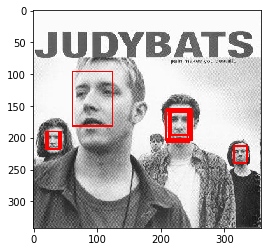

In [1103]:
judybats = Image.open('hw2/faces/judybats.jpg')
t = FindTemplate(MakePyramid(judybats, 10), temp_im, 0.641);
plt.imshow(t);

/Users/iki/anaconda3/courses_code/cpsc_425/task2/hw2/ncc.py:59: RuntimeWarning: divide by zero encountered in true_divide
  nxcorr = np.where(denom < tol, 0, numer/denom)


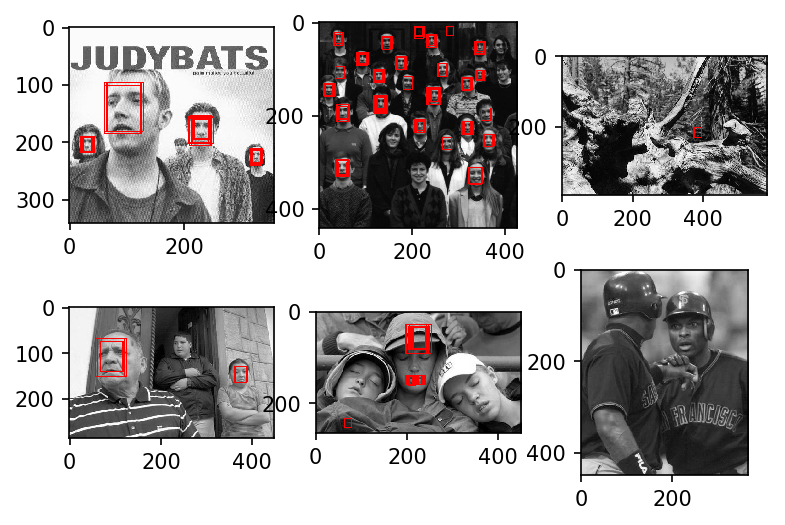

In [1104]:
pyramids = [MakePyramid(i, 10) for i in imgs]
threshold = 0.6
face_imgs = [FindTemplate(p, temp_im, threshold) for p in pyramids]
plotNImages(face_imgs, 2, 3)

In [1]:
# input: set of imgs to be displayed, the amount of
#       images per row and column
# returns: nothing
# effect: plots the images in the number of rows and columns given
def plotNImages(imgs, row, col):
    fig, ax = plt.subplots(row, col)
    fig.dpi = 150
    
    
    i = 0
    for j in range(row):
        for k in range(col):
            ax[j,k].imshow(imgs[i]);
            i += 1

IndentationError: expected an indented block (<ipython-input-1-9d2ea368c2a6>, line 10)

#### Question 5
The current threshold of 0.6 gets a pretty good error rate overall -counting all true and false positive faces in all images-, but still fails to detect some faces or detects incorrect features as faces.

#### Question 6
$$Recall = \frac{True Pos.}{total True} = \frac{27}{32}$$
This is the recall rate with a threshold of 0.6. NCC has low recall rate in some images because the correlation between the template and an image patch varies greatly depending on pixel color and shapes, it is not entierly redundant to different face positions or even expressions.